# <a id='toc1_'></a>[**Waze_Logistic_Regression**](#toc0_)

**Course 5 - Regression analysis: Simplify complex data relationships**

**Table of contents**<a id='toc0_'></a>    
- [**Waze_Logistic_Regression**](#toc1_)    
  - [**Scenario**](#toc1_1_)    
    - [**Email from Ursula Sayo, Operations Manager**](#toc1_1_1_)    
    - [**Email from May Santner, Data Analysis Manager**](#toc1_1_2_)    
    - [**Email from May Santner, Data Analysis Manager**](#toc1_1_3_)    
    - [**Data Dictionary**](#toc1_1_4_)    
    - [**Objectives**](#toc1_1_5_)    
  - [**PACE Stages**](#toc1_2_)    
  - [**PACE:Plan**](#toc1_3_)    
    - [**Task 1. Imports and data loading**](#toc1_3_1_)    
  - [**PACE: Analyze**](#toc1_4_)    
    - [**Task 2a. Explore data with EDA**](#toc1_4_1_)    
    - [**Task 2b. Create features**](#toc1_4_2_)    
      - [**`km_per_driving_day`**](#toc1_4_2_1_)    
      - [**`professional_driver`**](#toc1_4_2_2_)    
  - [**PACE: Construct**](#toc1_5_)    
    - [**Task 3a. Preparing variables**](#toc1_5_1_)    
      - [**Impute outliers**](#toc1_5_1_1_)    
      - [**Encode categorical variables**](#toc1_5_1_2_)    
    - [**Task 3b. Determine whether assumptions have been met**](#toc1_5_2_)    
      - [**Collinearity**](#toc1_5_2_1_)    
    - [**Task 3c. Create dummies (if necessary)**](#toc1_5_3_)    
    - [**Task 3d. Model building**](#toc1_5_4_)    
      - [**Assign predictor variables and target**](#toc1_5_4_1_)    
      - [**Split the data**](#toc1_5_4_2_)    
      - [**Check final assumption**](#toc1_5_4_3_)    
  - [**PACE: Execute**](#toc1_6_)    
    - [**Task 4a. Results and evaluation**](#toc1_6_1_)    
    - [**Task 4b. Show results with a confusion matrix**](#toc1_6_2_)    
    - [**BONUS**](#toc1_6_3_)    
    - [**Task 4c. Conclusion**](#toc1_6_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[**Scenario**](#toc0_)

The data team at Waze is more than halfway through their project for developing a machine learning model to predict user churn. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, the Operations Manager at Waze. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

### <a id='toc1_1_1_'></a>[**Email from Ursula Sayo, Operations Manager**](#toc0_)

**Subject:** Details on Regression Model

**From:** "Ursula Sayo," Ursula@Waze

**Cc:** "Harriet Hadzic," Harriet@waze, "Chidi Ga," Chidi@waze, "Sylvester Esperanza," Sylvester@Waze, "May Santner," May@Waze

Hello data team,

I really appreciate your work, and thanks for the explanation of the next phase of the algorithm creation.

I was hoping to get a bit more detail on regression. Will you be applying a linear or logistic regression model? It wasn’t clear in the meeting, and I want to align on expectations. 

Thank you, 

Ursula Sayo

Operations Manager

Waze

### <a id='toc1_1_2_'></a>[**Email from May Santner, Data Analysis Manager**](#toc0_)

**Subject:** RE: Details on Regression Model

**From:** "May Santner," May@Waze

**Cc:** "Harriet Hadzic," Harriet@waze, "Chidi Ga," Chidi@waze, "Sylvester Esperanza," Sylvester@Waze, "Ursula Sayo," Ursula@Waze

Thank you for your email. 

Apologies that the details were not made clear in our meeting.

To answer your question, we will build a binomial logistic regression model. Because we want to predict user churn, the binomial logistic regression model will be our confirmation for how best to proceed with the ML algorithm in the final phase of the project. 

Our team will be working on getting you the results of our analysis this week.

Feel free to reach out with additional questions. 

Many thanks,

May Santner

Data Analysis Manager

Waze

### <a id='toc1_1_3_'></a>[**Email from May Santner, Data Analysis Manager**](#toc0_)

**Subject:** RE: Details on Regression Model

**From:** "May Santner," May@Waze

**Cc:** "Chidi Ga," Chidi@Waze

Hello team! 

Would you two mind completing the following? 

* Build a binomial logistic regression model in a code notebook

* Write an executive summary of your results

I’d appreciate a chance to review your work before you send it over to Ursula, but write the summary as if you’re addressing the leadership team. 

Best regards,

May Santner

Data Analysis Manager

Waze

### <a id='toc1_1_4_'></a>[**Data Dictionary**](#toc0_)

**Waze dataset overview**

This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze. Examine each data variable gathered.

This dataset contains:

**14,999 rows** - each row represents one unique user

**13 columns**

| Column name                 | Type  | Description                                                                 |
|----------------------------|-------|-----------------------------------------------------------------------------|
| ID                         | int   | A sequential numbered index                                                 |
| label                      | obj   | Binary target variable (“retained” vs “churned”) indicating user churn status during the month |
| sessions                   | int   | Number of times a user opened the app during the month                      |
| drives                     | int   | Number of occurrences where a user drove at least 1 km during the month    |
| device                     | obj   | Type of device used to start a session (e.g., Android or iPhone)            |
| total_sessions             | float | Model-estimated total number of sessions since the user onboarded           |
| n_days_after_onboarding    | int   | Number of days since the user signed up for the app                          |
| total_navigations_fav1     | int   | Total navigations since onboarding to the user’s favorite location 1        |
| total_navigations_fav2     | int   | Total navigations since onboarding to the user’s favorite location 2        |
| driven_km_drives           | float | Total kilometers driven during the month                                    |
| duration_minutes_drives    | float | Total duration driven (in minutes) during the month                         |
| activity_days              | int   | Number of days the user opened the app during the month                     |
| driving_days               | int   | Number of days the user drove at least 1 km during the month                |


### <a id='toc1_1_5_'></a>[**Objectives**](#toc0_)

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

## <a id='toc1_2_'></a>[**PACE Stages**](#toc0_)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## <a id='toc1_3_'></a>[**PACE:Plan**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### <a id='toc1_3_1_'></a>[**Task 1. Imports and data loading**](#toc0_)
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Import the dataset

In [2]:
df = pd.read_csv('waze_dataset.csv')

## <a id='toc1_4_'></a>[**PACE: Analyze**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

**Answer**

Some of the purposes of EDA before constructing a logisitc regression model are to check for outliers and extreme data values as this can significantly impact logistic regression models. After visualising the data, a plan is made for addressing the outliers such as by dropping the rows, substituting extreme data values with average data or removing data values greater than 3 standard deviations. Another purpose of EDA before model construction is to help the analyst identify missing data which in turn helps to make the decisions of their exclusion or inclusion by substituting values with dataset means, medians and other similar methods. Additionally, it can be useful to engineer more variables via multiplying the variables together or by calculating the ratio between two variables.

### <a id='toc1_4_1_'></a>[**Task 2a. Explore data with EDA**](#toc0_)

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`

In [3]:
df.shape

(14999, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Question:** Are there any missing values in your data?

**Answer**

Yes, there is 700 missing values in the `label` column which is our target variable.

Use `.head()`.

In [5]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [6]:
df = df.drop('ID', axis=1)

Now, check the class balance of the dependent (target) variable, `label`.

In [7]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Call `.describe()` on the data.

In [8]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

**Answer**

Yes, several of the variables show signs of having outliers, as their maximum values are multiple standard deviations above their 75th percentile.

This is evident in particular for:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

Thereby showing a possible indication of outliers in these variables, which could be due to a small number of highly active or long-tenured users.

### <a id='toc1_4_2_'></a>[**Task 2b. Create features**](#toc0_)

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### <a id='toc1_4_2_1_'></a>[**`km_per_driving_day`**](#toc0_)

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [9]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [10]:
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### <a id='toc1_4_2_2_'></a>[**`professional_driver`**](#toc0_)

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [11]:
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [12]:
print(df['professional_driver'].value_counts())

df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

## <a id='toc1_5_'></a>[**PACE: Construct**](#toc0_)

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In this stage, consider the following question:

* Why did you select the X variables you did?

**Answer**

I chose the X variables I did initially based on the business objective and insights from the EDA, as well as some variables having high multicollinearity. In the future, with the rerunning and fine-tuning of models, other variables can be selected or deselected based on their relevance and affect on the models metrics such as accuracy, precision and recall. 

### <a id='toc1_5_1_'></a>[**Task 3a. Preparing variables**](#toc0_)

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [14]:
df = df.dropna(subset=['label'])

#### <a id='toc1_5_1_1_'></a>[**Impute outliers**](#toc0_)

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

In [15]:
# Impute outliers
def outlier(variable, percentile):
    threshold = df[variable].quantile(percentile)
    df.loc[df[variable] > threshold, variable] = threshold
    print(f'{variable} | percentile: {percentile} | threshold: {threshold}')

for variable in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
                 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    outlier(variable, 0.95)

sessions | percentile: 0.95 | threshold: 243.0
drives | percentile: 0.95 | threshold: 200.0
total_sessions | percentile: 0.95 | threshold: 455.4394923899998
total_navigations_fav1 | percentile: 0.95 | threshold: 422.0
total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999


Call `describe()`.

In [16]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### <a id='toc1_5_1_2_'></a>[**Encode categorical variables**](#toc0_)

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [17]:
df['label2'] = df['label'].map({'retained': 0,
                                 'churned': 1})

### <a id='toc1_5_2_'></a>[**Task 3b. Determine whether assumptions have been met**](#toc0_)

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### <a id='toc1_5_2_1_'></a>[**Collinearity**](#toc0_)

Check the correlation among predictor variables. First, generate a correlation matrix.

In [18]:
df.corr(method='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

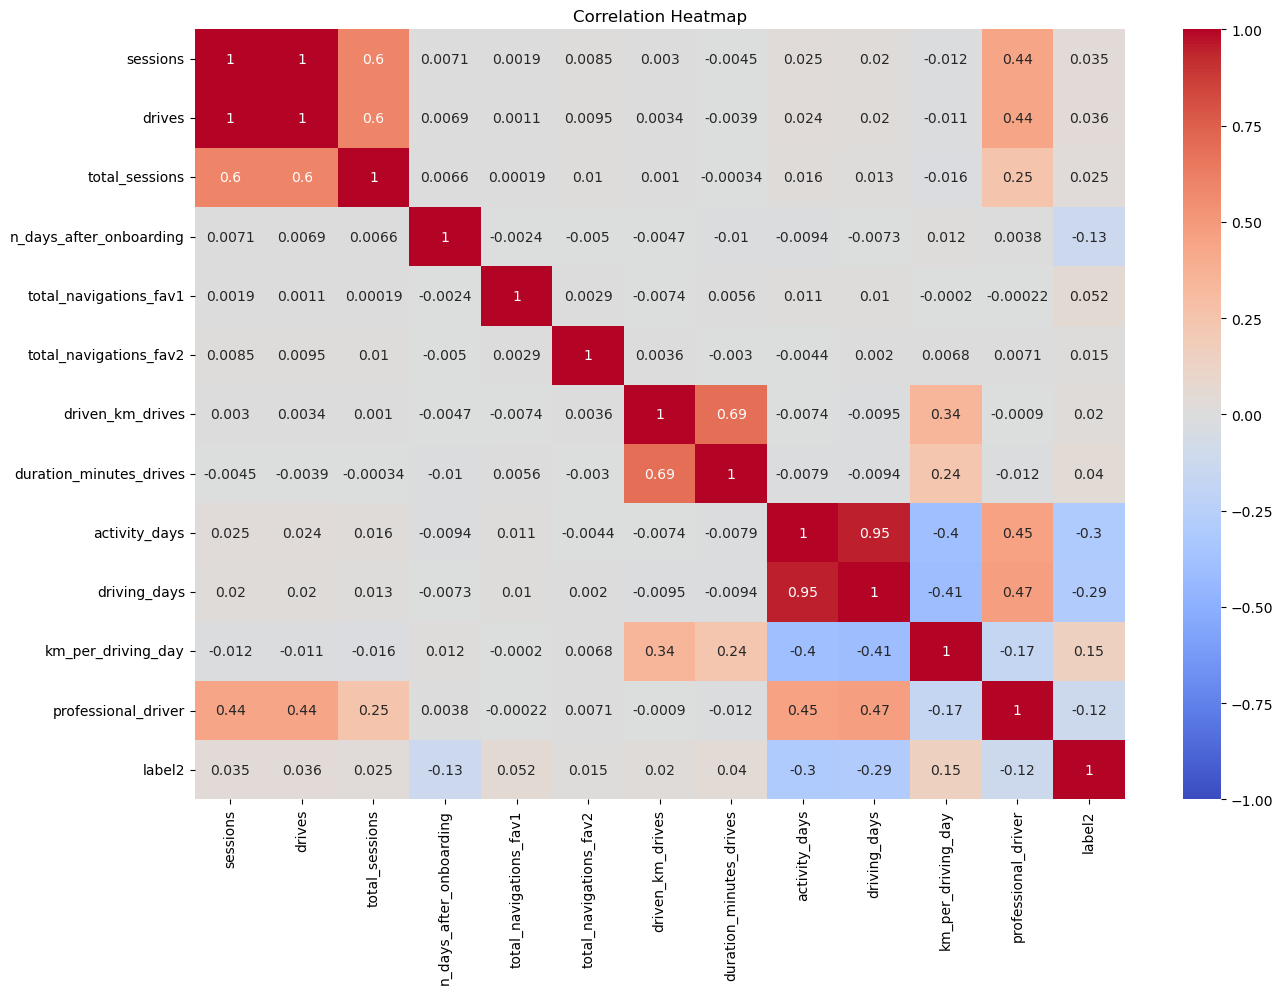

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

**Answer**

* `sessions` and `drives`: 1.0
* `activity_days` and `driving_days`: 0.95

### <a id='toc1_5_3_'></a>[**Task 3c. Create dummies (if necessary)**](#toc0_)

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [20]:
df['device2'] = np.where(df['device'] == 'Android', 0, 1)

### <a id='toc1_5_4_'></a>[**Task 3d. Model building**](#toc0_)

#### <a id='toc1_5_4_1_'></a>[**Assign predictor variables and target**](#toc0_)

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [21]:
X = df.copy()
X = X.drop(['label', 'label2', 'device', 'sessions', 'driving_days'], axis=1)

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [22]:
y = df['label2']

#### <a id='toc1_5_4_2_'></a>[**Split the data**](#toc0_)

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
1245,200,455.439492,504,0,113,2707.906201,1090.476086,30,100.292822,1,1
7972,137,282.858310,3382,0,124,7113.176056,2005.715481,1,0.000000,0,1
4665,2,73.077779,2133,88,13,4089.069058,2737.176219,30,170.377877,0,1
11921,123,325.427459,3017,167,7,1457.283362,451.848000,13,132.480306,0,0
803,39,455.439492,78,126,51,4772.509343,2837.036812,28,238.625467,0,1


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [25]:
clf = LogisticRegression(penalty=None, max_iter=400)
clf.fit(X_train, y_train)

c:\Users\alexa\anaconda3\envs\google_advanced_data_analytics\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [26]:
clf.coef_

array([[ 1.77539280e-03,  4.21897716e-04, -3.96405110e-04,
         1.32600757e-03,  7.22556637e-04, -1.90227715e-05,
         1.06794677e-04, -1.02885818e-01,  3.22953026e-05,
        -3.44871586e-02,  2.81182501e-02]])

In [27]:
coef = pd.Series(clf.coef_[0],
                 index = X.columns)
coef

drives                     0.001775
total_sessions             0.000422
n_days_after_onboarding   -0.000396
total_navigations_fav1     0.001326
total_navigations_fav2     0.000723
driven_km_drives          -0.000019
duration_minutes_drives    0.000107
activity_days             -0.102886
km_per_driving_day         0.000032
professional_driver       -0.034487
device2                    0.028118
dtype: float64

In [28]:
coef.to_csv('Waze Logistic Regression Variable Coefficients.csv')

Call the model's `intercept_` attribute to get the intercept of the model.

In [29]:
clf.intercept_

array([-0.07445633])

#### <a id='toc1_5_4_3_'></a>[**Check final assumption**](#toc0_)

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [30]:
# Get the predicted probabilities of the training data
training_probabilities = clf.predict_proba(X_train)
training_probabilities

array([[0.93524075, 0.06475925],
       [0.72288458, 0.27711542],
       [0.97334983, 0.02665017],
       ...,
       [0.91817316, 0.08182684],
       [0.8507479 , 0.1492521 ],
       [0.93631738, 0.06368262]], shape=(11439, 2))

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [31]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `activity_days`.

Text(0.5, 1.0, 'Log-Odds - activity_days')

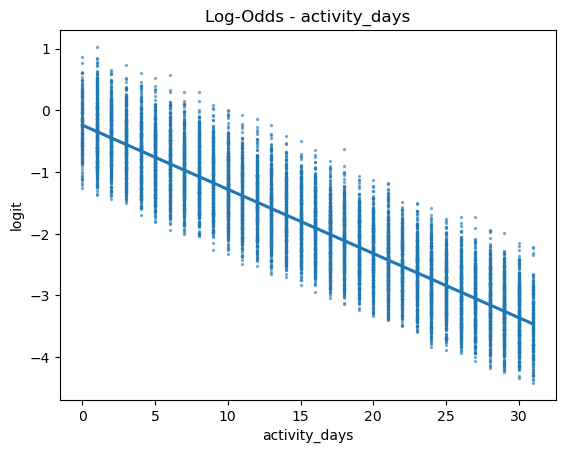

In [32]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2,
                                                                        'alpha': 0.5})
plt.title("Log-Odds - activity_days")

## <a id='toc1_6_'></a>[**PACE: Execute**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### <a id='toc1_6_1_'></a>[**Task 4a. Results and evaluation**](#toc0_)

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [33]:
y_pred = clf.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [34]:
clf.score(X_test, y_test)

0.8269230769230769

### <a id='toc1_6_2_'></a>[**Task 4b. Show results with a confusion matrix**](#toc0_)

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

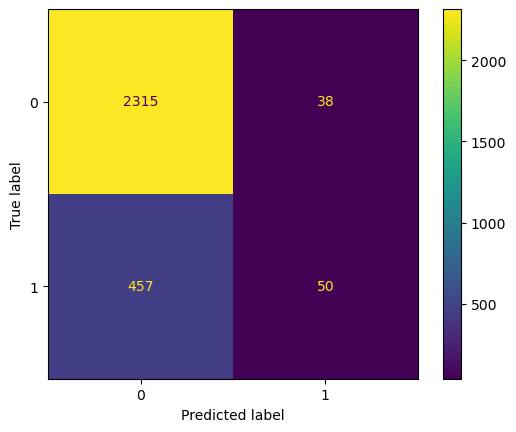

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [37]:
precision = 50 / (50 + 38)
precision

0.5681818181818182

In [38]:
prec = cm[1,1] / (cm[0,1] + cm[1,1])
prec

np.float64(0.5681818181818182)

In [39]:
recall = 50 / (50 + 457)
recall

0.09861932938856016

In [40]:
rec = cm[1,1] / (cm[1,0] + cm[1,1])
rec

np.float64(0.09861932938856016)

In [41]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.98      0.90      2353
     churned       0.57      0.10      0.17       507

    accuracy                           0.83      2860
   macro avg       0.70      0.54      0.54      2860
weighted avg       0.79      0.83      0.77      2860



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### <a id='toc1_6_3_'></a>[**BONUS**](#toc0_)

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [42]:
# Create a list of (column_name, coefficient) tuples
coeff_list = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
coeff_list = sorted(coeff_list, key=lambda x: x[1], reverse=True)
coeff_list

[('device2', np.float64(0.028118250093698532)),
 ('drives', np.float64(0.0017753927965677937)),
 ('total_navigations_fav1', np.float64(0.001326007572526119)),
 ('total_navigations_fav2', np.float64(0.0007225566369828804)),
 ('total_sessions', np.float64(0.0004218977161620086)),
 ('duration_minutes_drives', np.float64(0.00010679467709510079)),
 ('km_per_driving_day', np.float64(3.229530259700701e-05)),
 ('driven_km_drives', np.float64(-1.9022771505575278e-05)),
 ('n_days_after_onboarding', np.float64(-0.0003964051095000133)),
 ('professional_driver', np.float64(-0.03448715857675381)),
 ('activity_days', np.float64(-0.1028858181622794))]

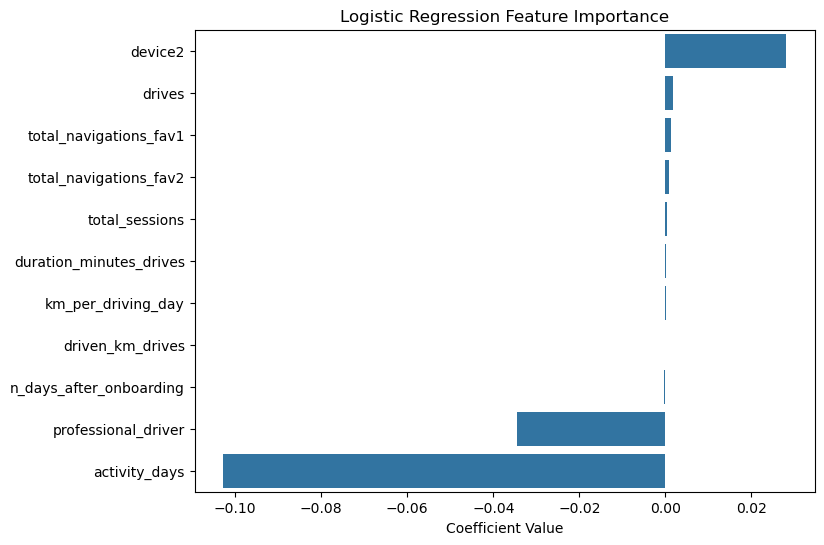

In [43]:
# Plot the feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=[x[1] for x in coeff_list],
            y=[x[0] for x in coeff_list],
            orient='h')
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.show()

### <a id='toc1_6_4_'></a>[**Task 4c. Conclusion**](#toc0_)

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

2. Were there any variables that you expected to be stronger predictors than they were?

3. Why might a variable you thought to be important not be important in the model?

4. Would you recommend that Waze use this model? Why or why not?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?

**Answer:**

1. From the feature importance plot `activity_days` was the biggest influence to the models predictions, this is not surprising as this variable was very strongly correlated with `driving_days` which from the EDA we know has a negative correlation with churn.
   
2. Yes, I was expecting the engineered variable `km_per_driving_day` to be higher on the feature importance plot but was one of the lowest. This is a surprise as in the previous EDA, as the user churn rate increased so did the values in `km_per_driving_day`. In the correlation heatmap from earlier, this variable had a positive correlation with the target variable that was one of the strongest out of all the independent variables by a large margin. In the Logistic regression it was the second least important variable.
   
3. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.
   
4. In regards as to if I would recommend this model to be used, it is dependent on what the model will be used for. If the model is to be used and implemented into Waze and thereby used to inform subsequent business decisions, then I would not recommend it for use. This is due to the model not being a strong predictor as evident in the models poor recall score, confusion matrix results and classification report. On the other hand, if the model was to be only used to guide further exploratory efforts then it therefore has intrensnic value.
   
5. Actions taken to improve the model could be the engineering of new features to attempt to generate a better predictive signal, as is often the case when you have domain knowledge. In regards to this model, one of the engineered features (`professional_driver`) was the third most predictive predictor in the model, as evident on the feature importance plot. It could also be useful to scale the independent variables, and to reconstruct the model with different combinations of the predictor variables in order to reduce the noise from the unpredictive features.
   
6. Additional features I would like to have in order to improve the model are drive-level information for each user, such as drive times, geographic locations, etc. It would also be useful to have more granular data to know how users interact with the app. An example of this is how often do users report or confirm road hazard alerts/traffic/construction works? Finally, it would be helpful to obtain the monthly count of unique starting and ending locations that each driver inputs.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 